In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_theme()
plt.rc("font", family="Gulim")

In [ ]:
dat = pd.read_excel('수분방정식Rawdata_final.xlsx', sheet_name='수분방정식Rawdata')
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559697 entries, 0 to 559696
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Key       559697 non-null  object 
 1   전체통제      559697 non-null  int64  
 2   지역_연령_통제  559697 non-null  object 
 3   성별_연령_통제  559697 non-null  object 
 4   성별_지역_통제  559697 non-null  object 
 5   지역_통제     559697 non-null  object 
 6   일별_통제     559697 non-null  object 
 7   연령대_통제    559697 non-null  object 
 8   성별_통제     559697 non-null  object 
 9   스토어명      559697 non-null  object 
 10  측정기기      559697 non-null  object 
 11  채널        559697 non-null  object 
 12  시,도       559697 non-null  object 
 13  광역유무2     559697 non-null  object 
 14  년         559697 non-null  int64  
 15  월         559697 non-null  int64  
 16  일         559697 non-null  int64  
 17  시         559697 non-null  int64  
 18  시간대       559697 non-null  object 
 19  연령        559697 non-null  object 
 20  연령대 

In [ ]:
dat = dat.iloc[:, 9:]
dat = dat.drop(['key3333'], axis=1)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559697 entries, 0 to 559696
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   스토어명    559697 non-null  object 
 1   측정기기    559697 non-null  object 
 2   채널      559697 non-null  object 
 3   시,도     559697 non-null  object 
 4   광역유무2   559697 non-null  object 
 5   년       559697 non-null  int64  
 6   월       559697 non-null  int64  
 7   일       559697 non-null  int64  
 8   시       559697 non-null  int64  
 9   시간대     559697 non-null  object 
 10  연령      559697 non-null  object 
 11  연령대     559697 non-null  object 
 12  성별      559697 non-null  object 
 13  피부타입    555750 non-null  float64
 14  수분      559697 non-null  object 
 15  유분      559697 non-null  int64  
 16  탄력      559697 non-null  object 
 17  평균 기온   559697 non-null  object 
 18  강수량     559697 non-null  object 
 19  평균 풍속   559697 non-null  object 
 20  평균 습도   559697 non-null  object 
 21  일조합     55

In [ ]:
# 문자형으로 전체 변환
dat = dat.astype(str)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559697 entries, 0 to 559696
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   스토어명    559697 non-null  object
 1   측정기기    559697 non-null  object
 2   채널      559697 non-null  object
 3   시,도     559697 non-null  object
 4   광역유무2   559697 non-null  object
 5   년       559697 non-null  object
 6   월       559697 non-null  object
 7   일       559697 non-null  object
 8   시       559697 non-null  object
 9   시간대     559697 non-null  object
 10  연령      559697 non-null  object
 11  연령대     559697 non-null  object
 12  성별      559697 non-null  object
 13  피부타입    559697 non-null  object
 14  수분      559697 non-null  object
 15  유분      559697 non-null  object
 16  탄력      559697 non-null  object
 17  평균 기온   559697 non-null  object
 18  강수량     559697 non-null  object
 19  평균 풍속   559697 non-null  object
 20  평균 습도   559697 non-null  object
 21  일조합     559697 non-null  object
 

In [ ]:
# 결측치 '*' 포함 행 삭제
colname = list(dat.columns)

for i in colname:
    dat = dat[~dat[i].str.contains('\*')]

dat = dat.reset_index(drop=True) # index 초기화
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517034 entries, 0 to 517033
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   스토어명    517034 non-null  object
 1   측정기기    517034 non-null  object
 2   채널      517034 non-null  object
 3   시,도     517034 non-null  object
 4   광역유무2   517034 non-null  object
 5   년       517034 non-null  object
 6   월       517034 non-null  object
 7   일       517034 non-null  object
 8   시       517034 non-null  object
 9   시간대     517034 non-null  object
 10  연령      517034 non-null  object
 11  연령대     517034 non-null  object
 12  성별      517034 non-null  object
 13  피부타입    517034 non-null  object
 14  수분      517034 non-null  object
 15  유분      517034 non-null  object
 16  탄력      517034 non-null  object
 17  평균 기온   517034 non-null  object
 18  강수량     517034 non-null  object
 19  평균 풍속   517034 non-null  object
 20  평균 습도   517034 non-null  object
 21  일조합     517034 non-null  object
 

In [ ]:
# data type 변환
dat = dat.astype({'연령':np.int64, '수분':np.int64, '유분':np.int64, '탄력':np.int64, '평균 기온':np.float64, '강수량':np.float64, '평균 풍속':np.float64, '평균 습도':np.float64, '일조합':np.float64, '미세먼지':np.int64})
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517034 entries, 0 to 517033
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   스토어명    517034 non-null  object 
 1   측정기기    517034 non-null  object 
 2   채널      517034 non-null  object 
 3   시,도     517034 non-null  object 
 4   광역유무2   517034 non-null  object 
 5   년       517034 non-null  object 
 6   월       517034 non-null  object 
 7   일       517034 non-null  object 
 8   시       517034 non-null  object 
 9   시간대     517034 non-null  object 
 10  연령      517034 non-null  int64  
 11  연령대     517034 non-null  object 
 12  성별      517034 non-null  object 
 13  피부타입    517034 non-null  object 
 14  수분      517034 non-null  int64  
 15  유분      517034 non-null  int64  
 16  탄력      517034 non-null  int64  
 17  평균 기온   517034 non-null  float64
 18  강수량     517034 non-null  float64
 19  평균 풍속   517034 non-null  float64
 20  평균 습도   517034 non-null  float64
 21  일조합     51

In [ ]:
dat.tail(1)

,스토어명,측정기기,채널,"시,도",광역유무2,년,월,일,시,시간대,...,피부타입,수분,유분,탄력,평균 기온,강수량,평균 풍속,평균 습도,일조합,미세먼지
517033,아리따움 경복궁역점,스킨터치1,아리따움,서울특별시,관악구,2013,10,15,16,오후,...,1.0,1,62,10,15.8,13.5,2.5,58.0,249.9,29


In [ ]:
dat.to_csv('수분방정식.csv', encoding='euc-kr')

# EDA

## Target
수분

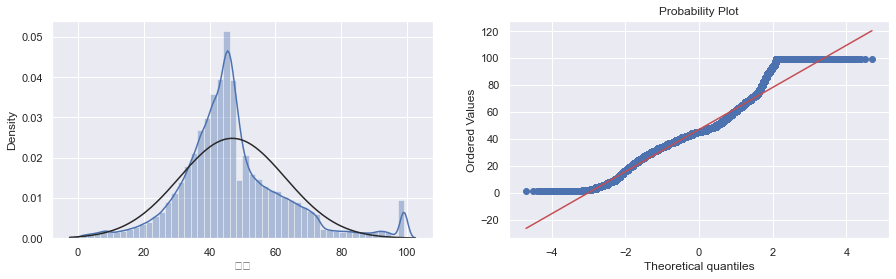

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(dat['수분'], fit=norm, ax=ax[0])
stats.probplot(dat['수분'], plot=plt)
plt.show()

In [ ]:
dat['수분'].describe()

count    517034.000000
mean         46.902244
std          16.081638
min           1.000000
25%          38.000000
50%          45.000000
75%          54.000000
max          99.000000
Name: 수분, dtype: float64

In [ ]:
print(dat['수분'].skew())
print(dat['수분'].kurt())

0.7697578831519565
1.7469492258990091


## numeric
연령, 유분, 탄력, 평균 기온, 강수량, 평균 풍속, 평균 습도, 일조합, 미세먼지

In [ ]:
dat.describe()

,연령,수분,유분,탄력,평균 기온,강수량,평균 풍속,평균 습도,일조합,미세먼지
count,517034.000000,517034.000000,517034.000000,517034.000000,517034.000000,517034.000000,517034.000000,517034.000000,517034.000000,517034.000000
mean,41.199515,46.902244,41.944038,51.898020,12.326748,109.384502,2.726177,61.081167,201.369480,44.852886
std,13.548970,16.081638,32.169156,20.128533,10.082988,142.582585,0.594928,10.924470,37.669272,11.561576
min,15.000000,1.000000,0.000000,1.000000,-7.200000,0.000000,1.200000,35.000000,33.900000,0.000000
25%,29.000000,38.000000,14.000000,36.000000,2.900000,22.500000,2.300000,54.000000,180.400000,36.000000
50%,40.000000,45.000000,36.000000,49.000000,12.300000,63.000000,2.700000,60.000000,197.000000,45.000000
75%,51.000000,54.000000,65.000000,68.000000,21.800000,137.300000,3.000000,69.000000,224.900000,52.000000
max,97.000000,99.000000,99.000000,98.000000,29.100000,1131.000000,5.900000,95.000000,307.800000,91.000000


### 연령

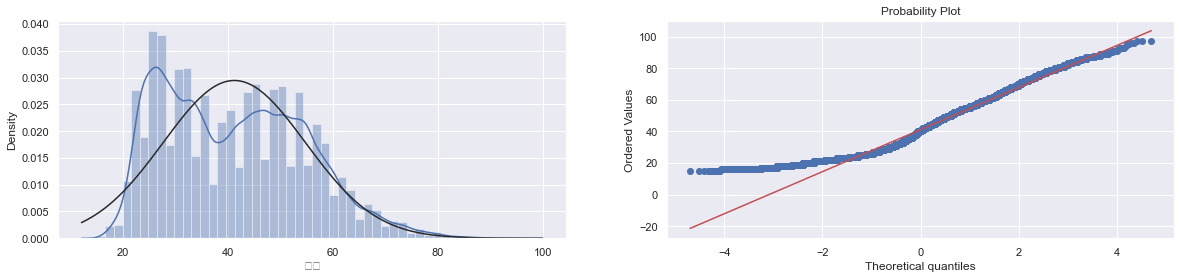

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['연령'], fit=norm, ax=ax[0])
stats.probplot(dat['연령'], plot=plt)
plt.show()

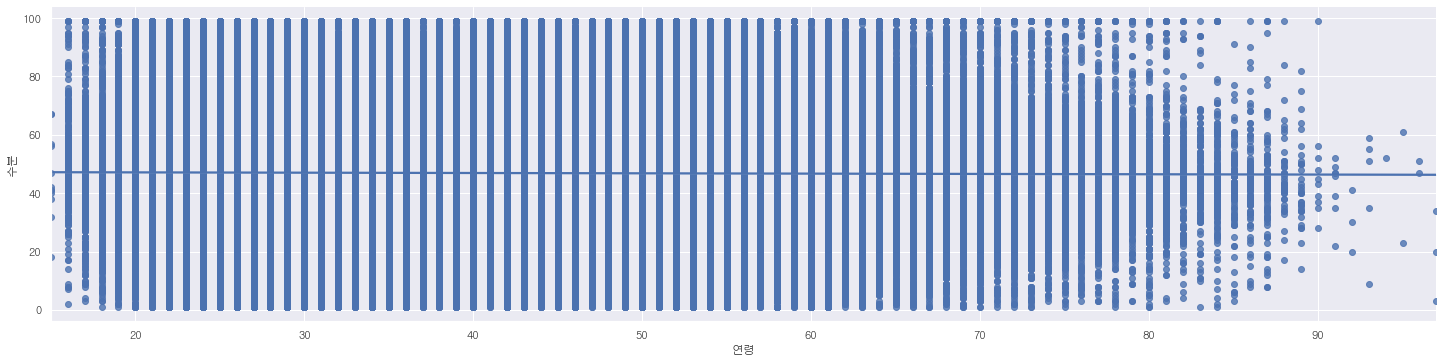

In [ ]:
sns.lmplot(x='연령', y='수분', data=dat, height=5, aspect=4)
plt.show()

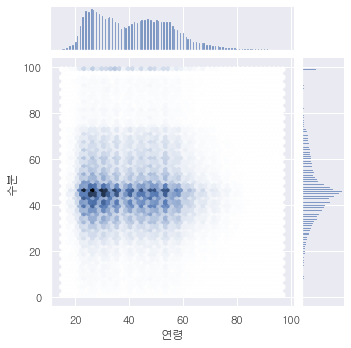

In [ ]:
sns.jointplot(x='연령', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 유분

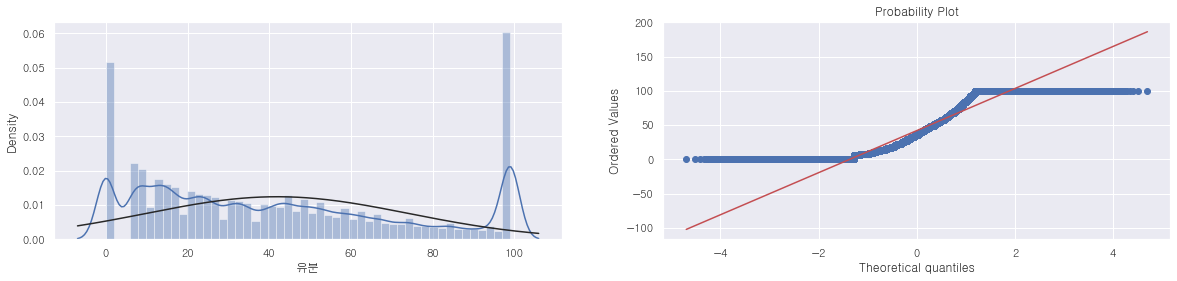

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['유분'], fit=norm, ax=ax[0])
stats.probplot(dat['유분'], plot=plt)
plt.show()

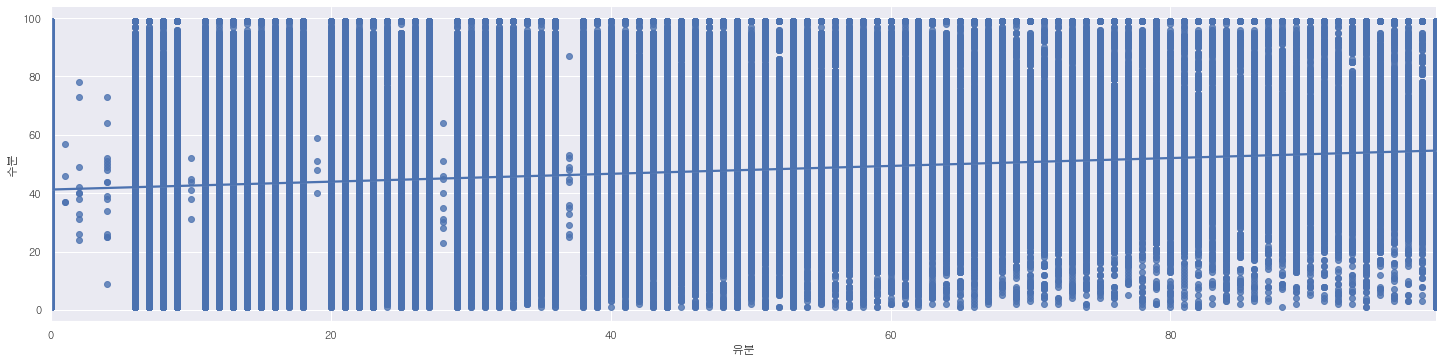

In [ ]:
sns.lmplot(x='유분', y='수분', data=dat, height=5, aspect=4)
plt.show()

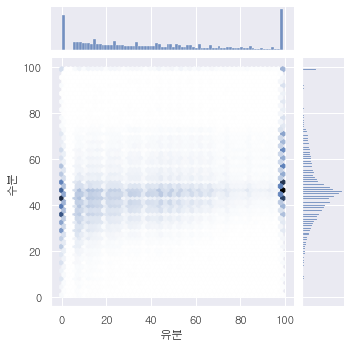

In [ ]:
sns.jointplot(x='유분', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 탄력

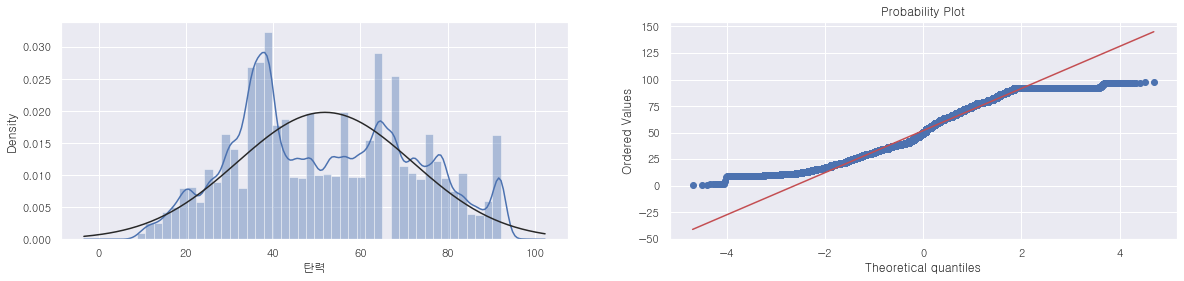

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['탄력'], fit=norm, ax=ax[0])
stats.probplot(dat['탄력'], plot=plt)
plt.show()

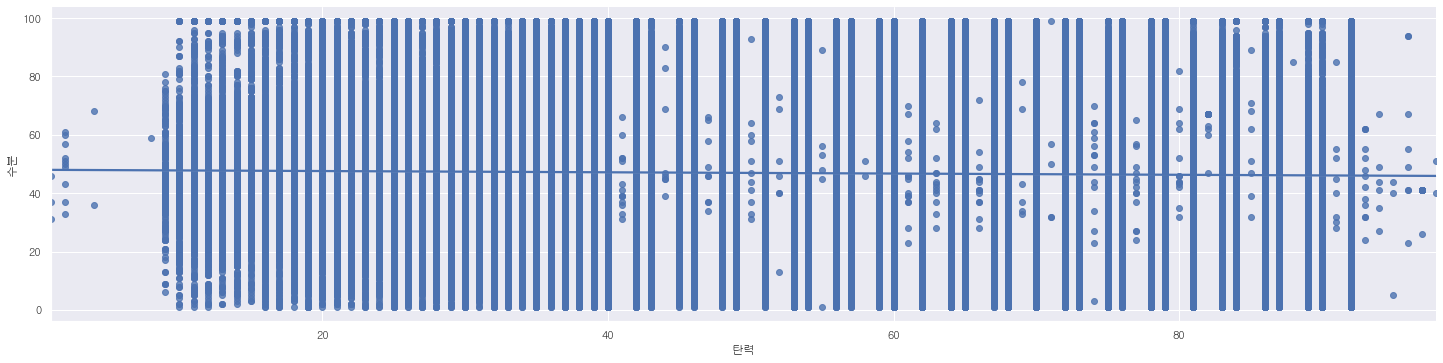

In [ ]:
sns.lmplot(x='탄력', y='수분', data=dat, height=5, aspect=4)
plt.show()

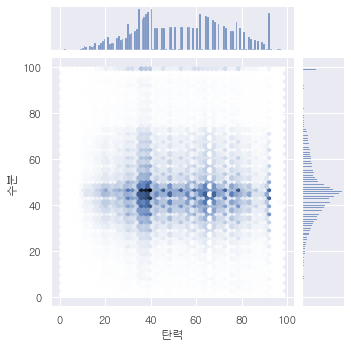

In [ ]:
sns.jointplot(x='탄력', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 평균 기온

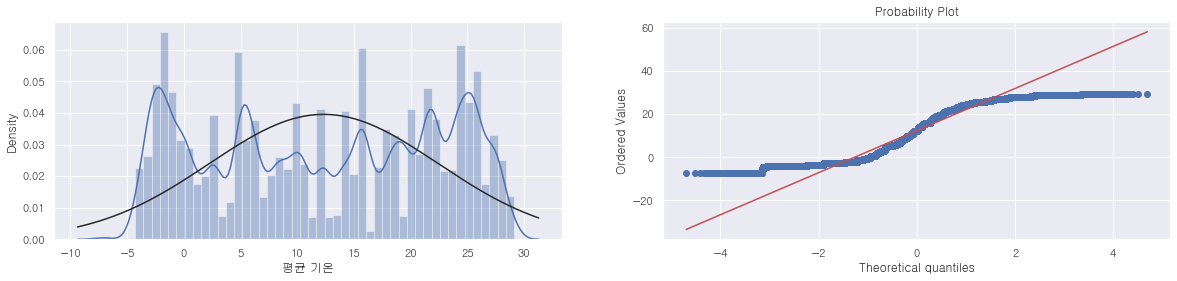

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['평균 기온'], fit=norm, ax=ax[0])
stats.probplot(dat['평균 기온'], plot=plt)
plt.show()

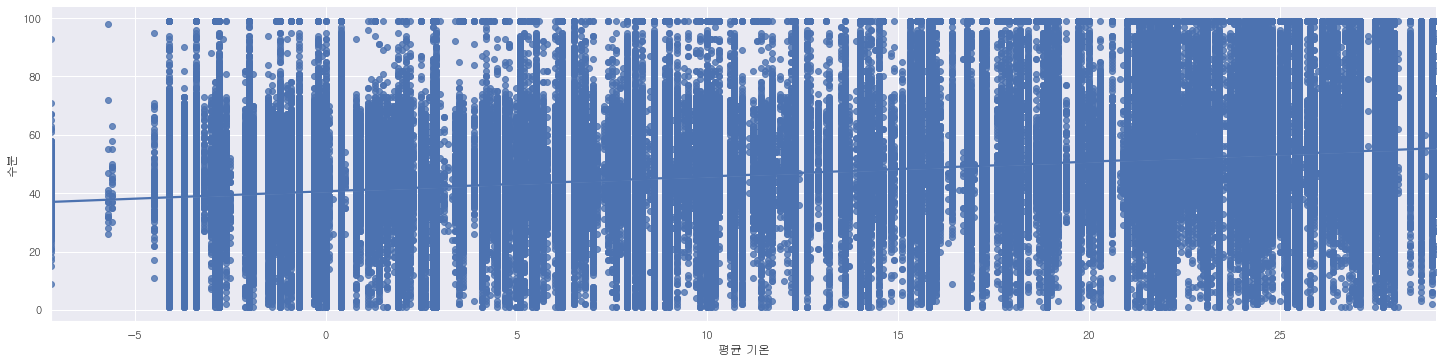

In [ ]:
sns.lmplot(x='평균 기온', y='수분', data=dat, height=5, aspect=4)
plt.show()

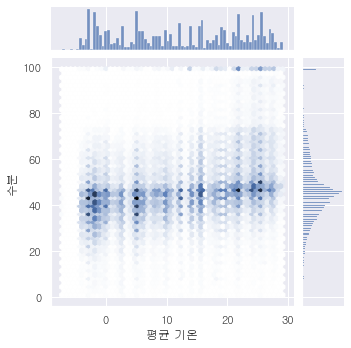

In [ ]:
sns.jointplot(x='평균 기온', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 강수량

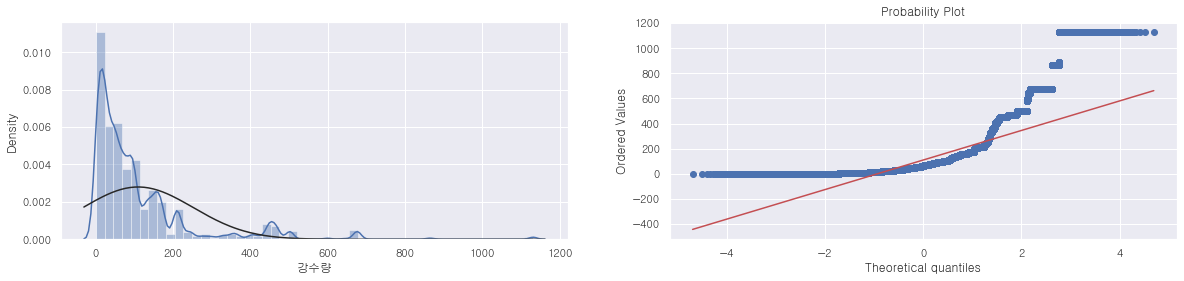

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['강수량'], fit=norm, ax=ax[0])
stats.probplot(dat['강수량'], plot=plt)
plt.show()

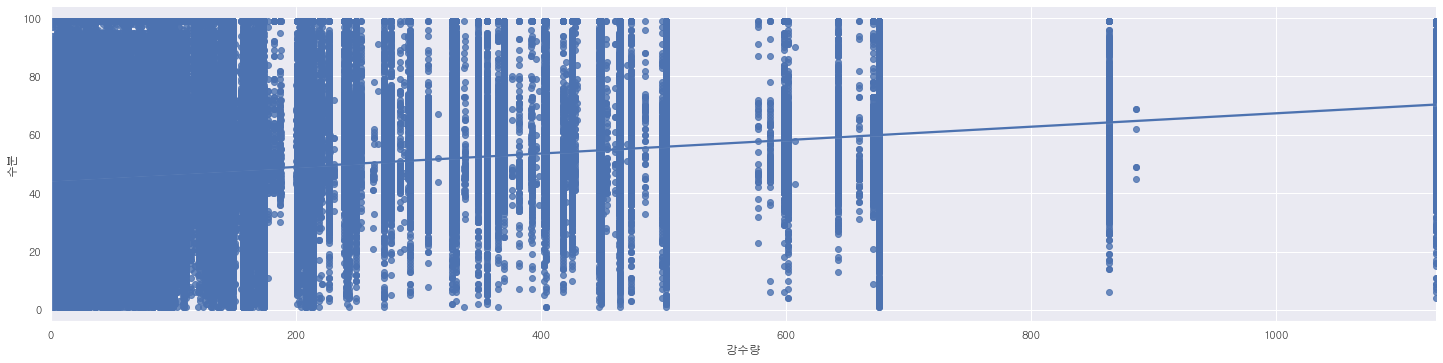

In [ ]:
sns.lmplot(x='강수량', y='수분', data=dat, height=5, aspect=4)
plt.show()

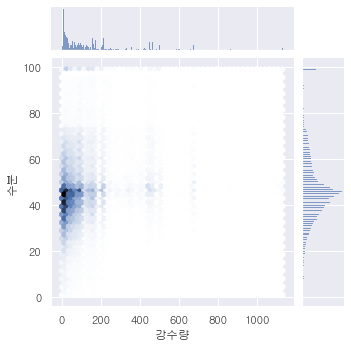

In [ ]:
sns.jointplot(x='강수량', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 평균 풍속

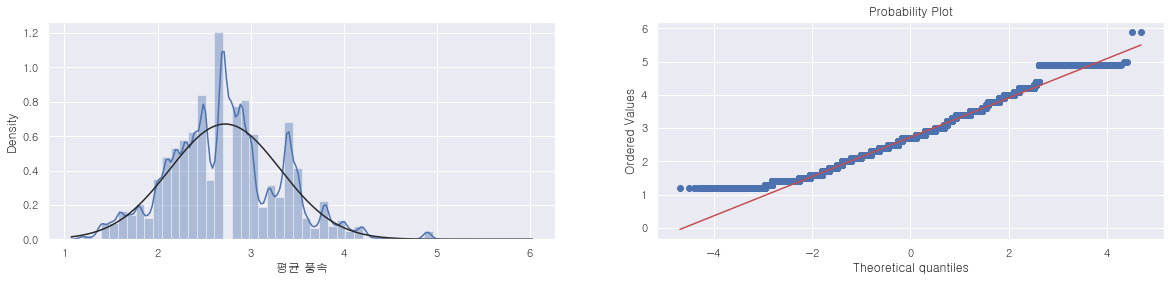

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['평균 풍속'], fit=norm, ax=ax[0])
stats.probplot(dat['평균 풍속'], plot=plt)
plt.show()

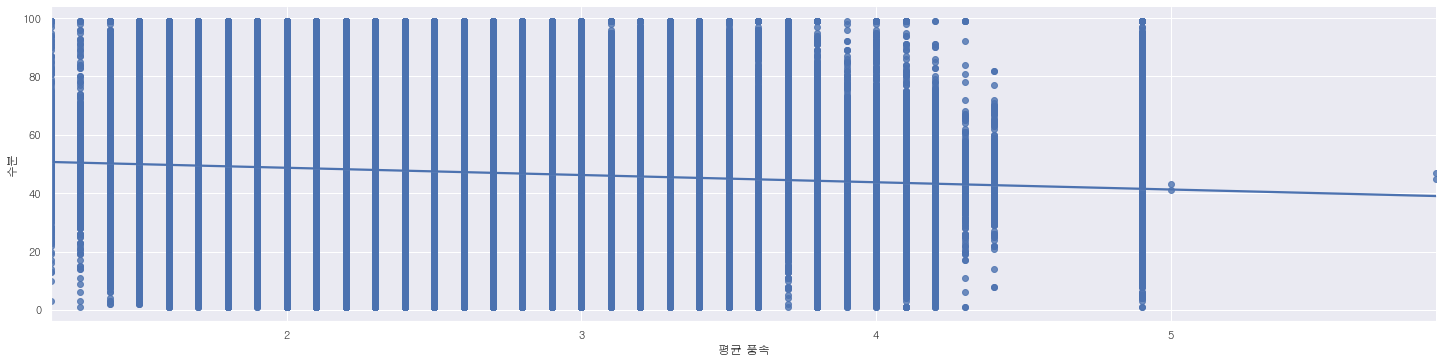

In [ ]:
sns.lmplot(x='평균 풍속', y='수분', data=dat, height=5, aspect=4)
plt.show()

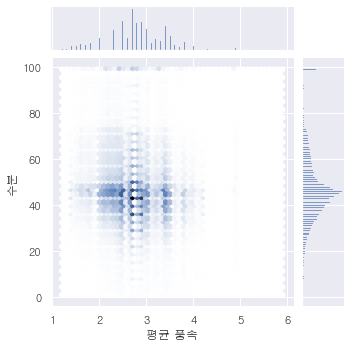

In [ ]:
sns.jointplot(x='평균 풍속', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 평균 습도

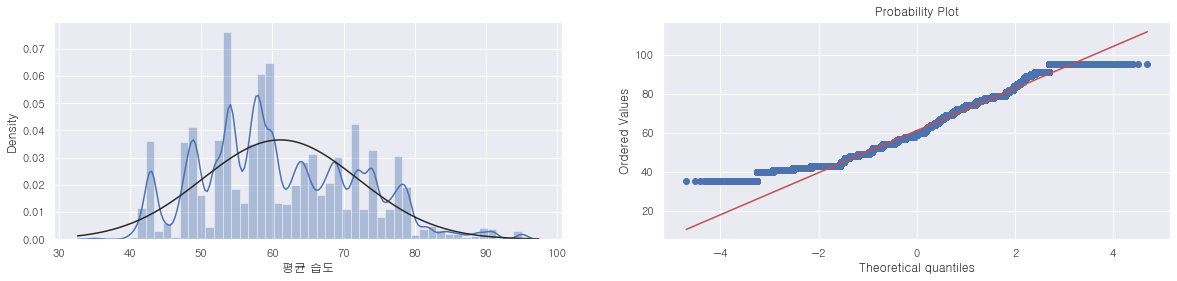

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['평균 습도'], fit=norm, ax=ax[0])
stats.probplot(dat['평균 습도'], plot=plt)
plt.show()

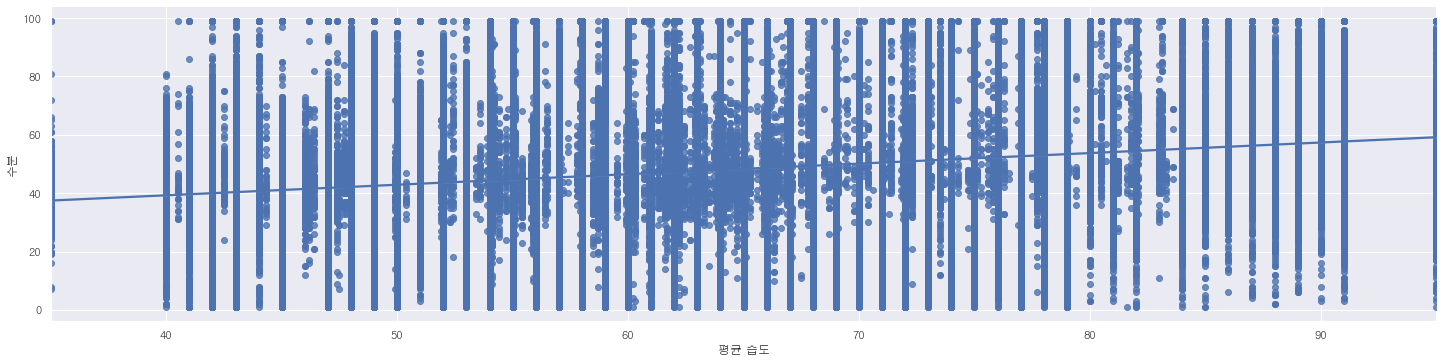

In [ ]:
sns.lmplot(x='평균 습도', y='수분', data=dat, height=5, aspect=4)
plt.show()

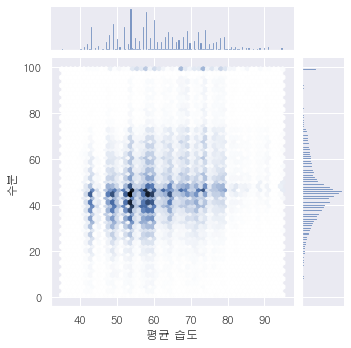

In [ ]:
sns.jointplot(x='평균 습도', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 일조합

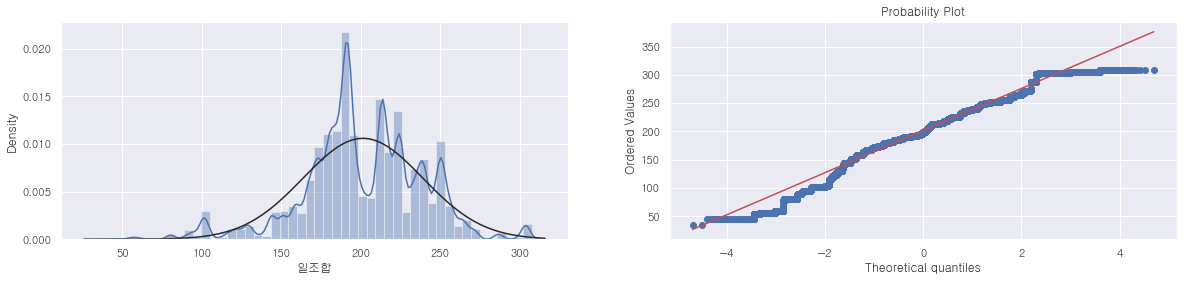

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['일조합'], fit=norm, ax=ax[0])
stats.probplot(dat['일조합'], plot=plt)
plt.show()

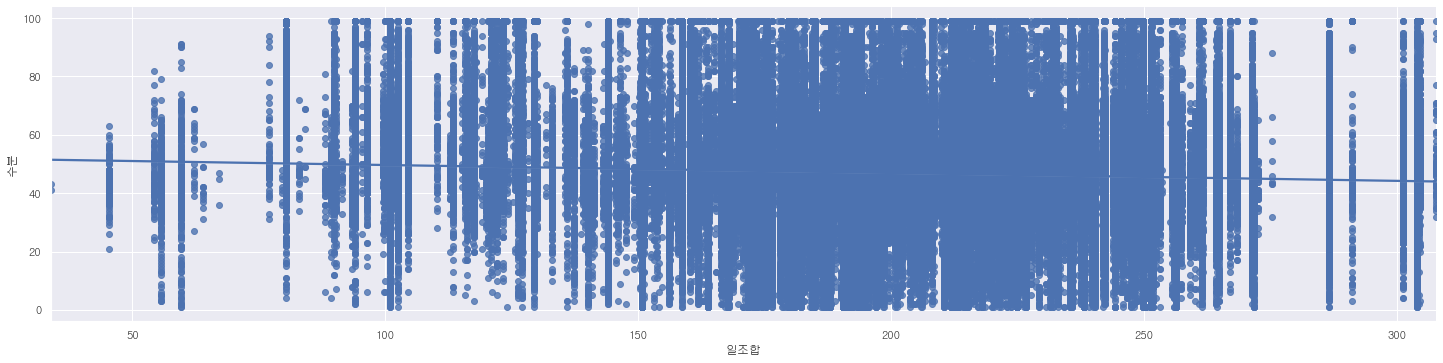

In [ ]:
sns.lmplot(x='일조합', y='수분', data=dat, height=5, aspect=4)
plt.show()

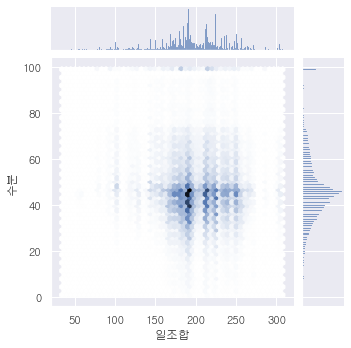

In [ ]:
sns.jointplot(x='일조합', y='수분', data=dat, kind='hex', height=5)
plt.show()

### 미세먼지

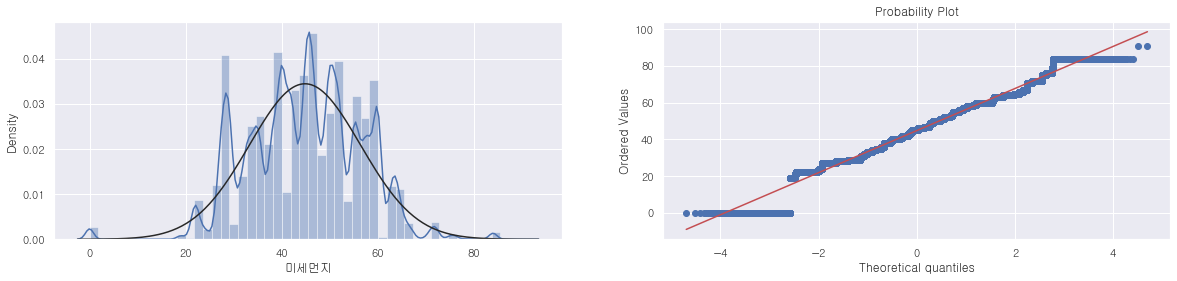

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.distplot(dat['미세먼지'], fit=norm, ax=ax[0])
stats.probplot(dat['미세먼지'], plot=plt)
plt.show()

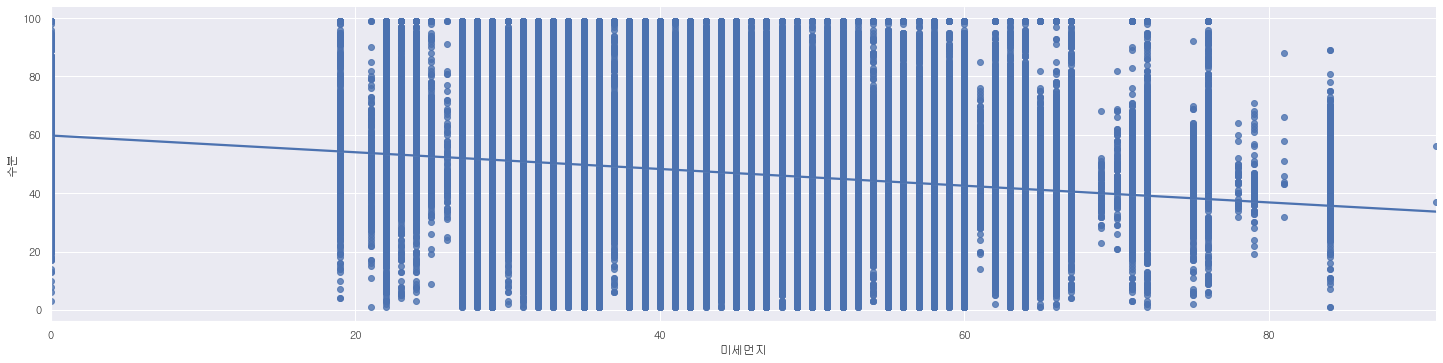

In [ ]:
sns.lmplot(x='미세먼지', y='수분', data=dat, height=5, aspect=4)
plt.show()

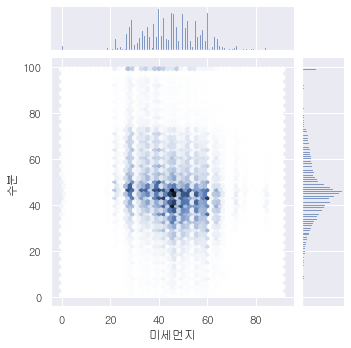

In [ ]:
sns.jointplot(x='미세먼지', y='수분', data=dat, kind='hex', height=5)
plt.show()

## Categorical
스토어명, 측정기기, 채널, 시,도, 광역유무2, 년, 월, 일, 시, 시간대, 연령대, 성별, 피부타입

### 스토어명

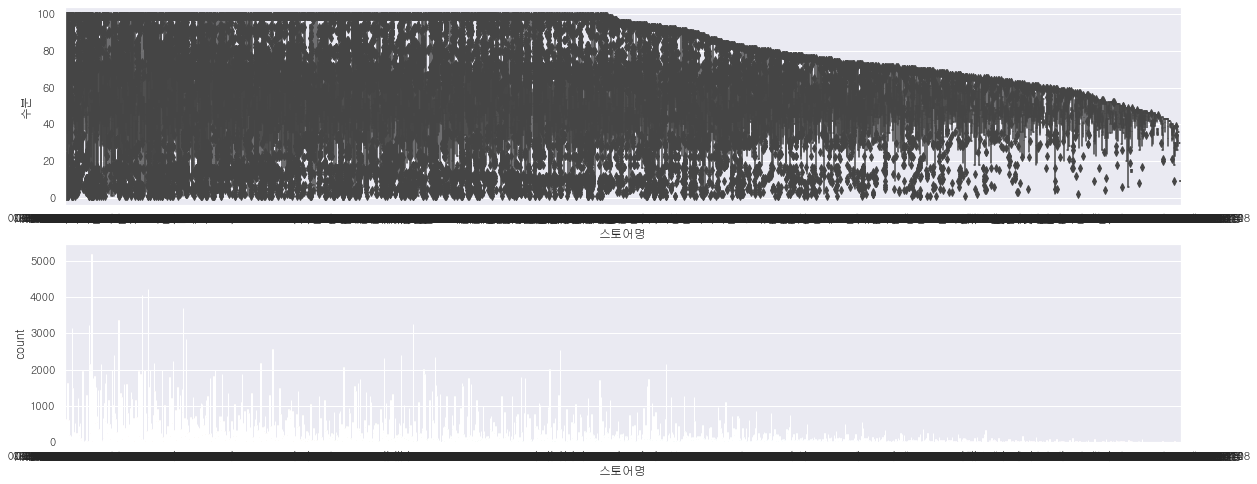

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='스토어명', y='수분', data=dat, ax=ax[0])
sns.countplot(x='스토어명', data=dat, ax=ax[1])
plt.show()

### 측정기기

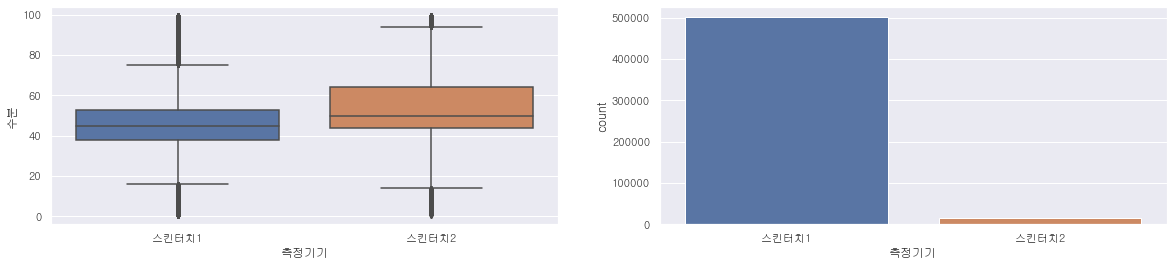

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.boxplot(x='측정기기', y='수분', data=dat, ax=ax[0])
sns.countplot(x='측정기기', data=dat, ax=ax[1])
plt.show()

### 채널

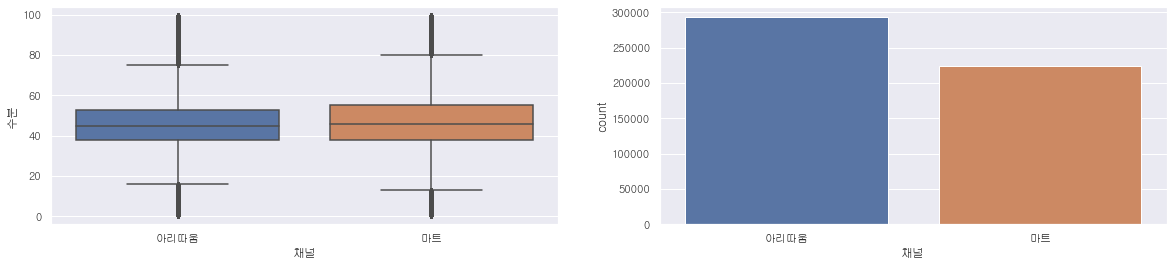

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.boxplot(x='채널', y='수분', data=dat, ax=ax[0])
sns.countplot(x='채널', data=dat, ax=ax[1])
plt.show()

### 시,도

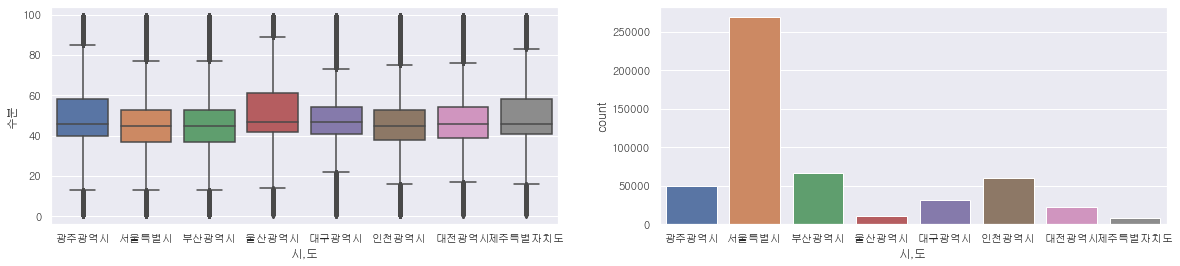

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.boxplot(x='시,도', y='수분', data=dat, ax=ax[0])
sns.countplot(x='시,도', data=dat, ax=ax[1])
plt.show()

### 광역유무2

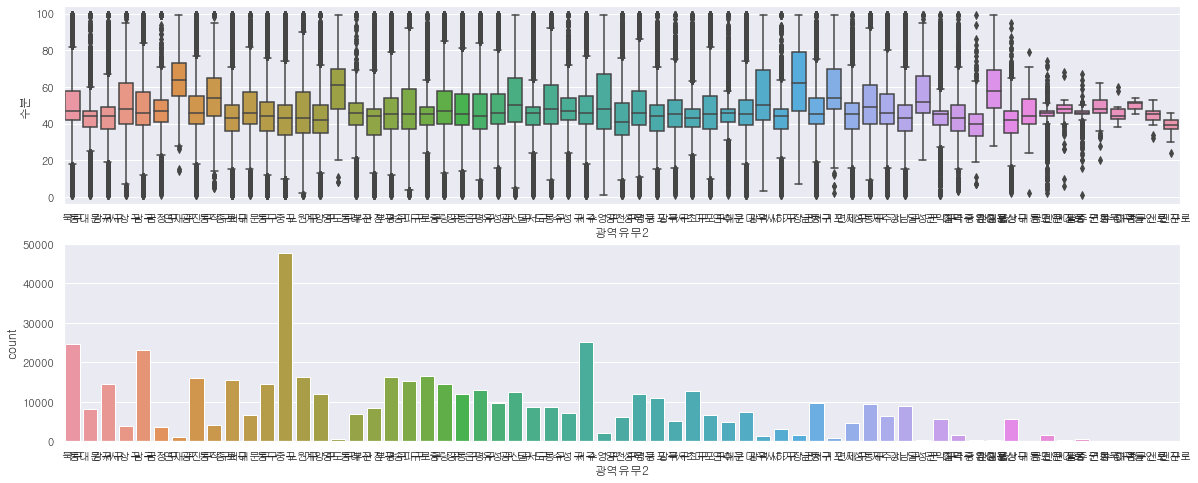

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='광역유무2', y='수분', data=dat, ax=ax[0])
sns.countplot(x='광역유무2', data=dat, ax=ax[1])
plt.show()

### 년

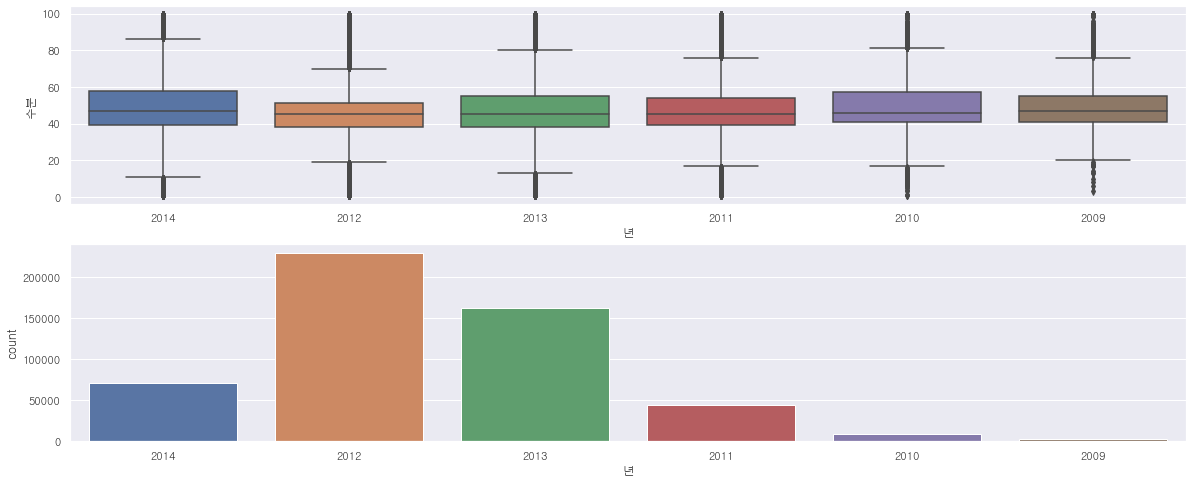

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='년', y='수분', data=dat, ax=ax[0])
sns.countplot(x='년', data=dat, ax=ax[1])
plt.show()

### 월

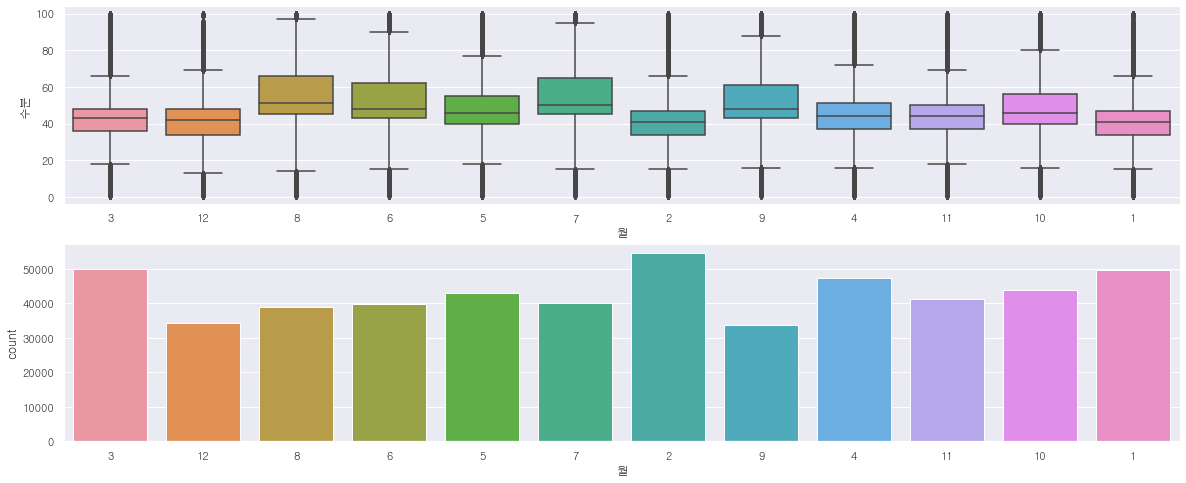

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='월', y='수분', data=dat, ax=ax[0])
sns.countplot(x='월', data=dat, ax=ax[1])
plt.show()

### 일

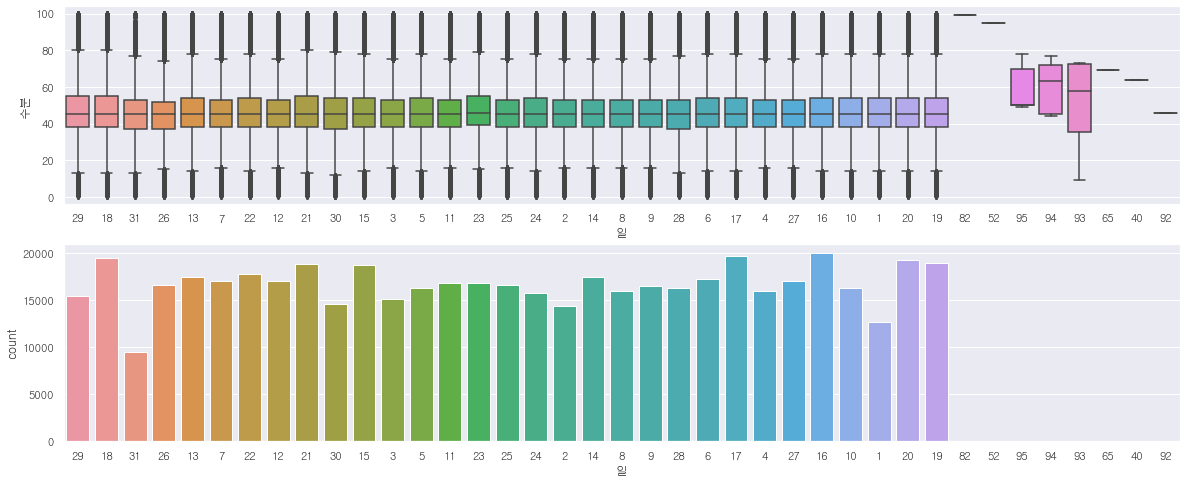

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='일', y='수분', data=dat, ax=ax[0])
sns.countplot(x='일', data=dat, ax=ax[1])
plt.show()

### 시

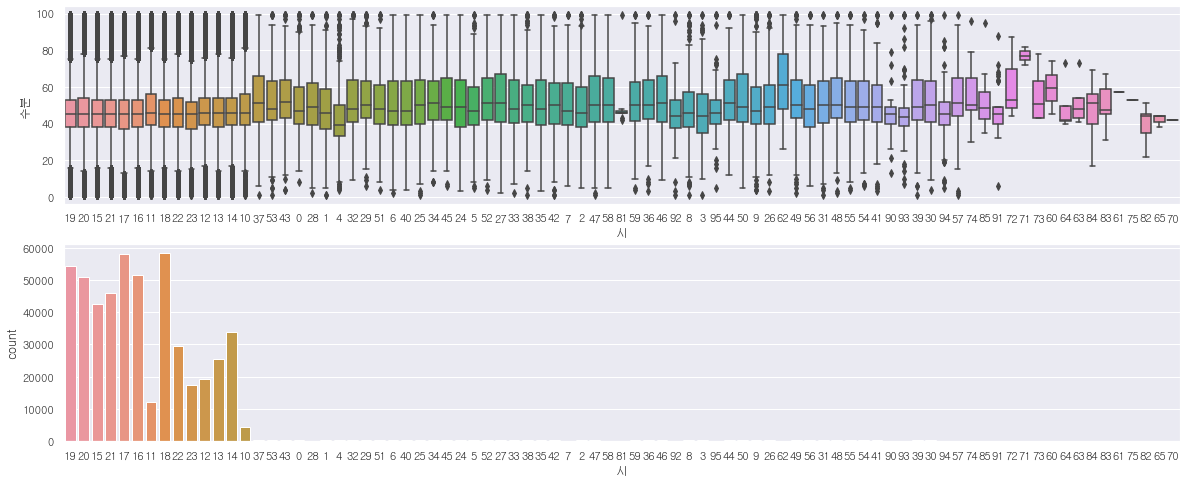

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='시', y='수분', data=dat, ax=ax[0])
sns.countplot(x='시', data=dat, ax=ax[1])
plt.show()

### 시간대

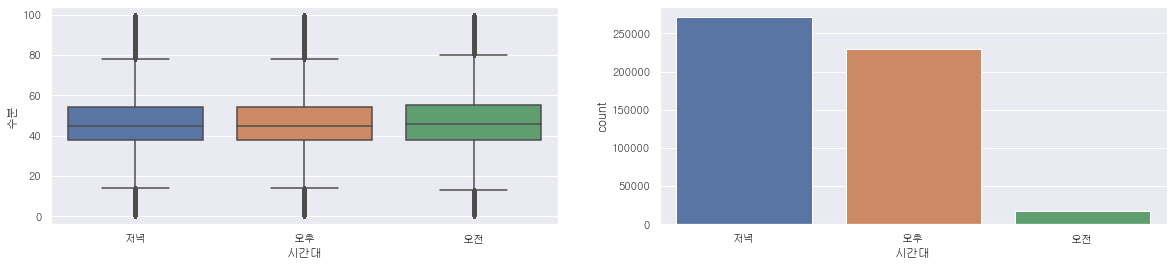

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.boxplot(x='시간대', y='수분', data=dat, ax=ax[0])
sns.countplot(x='시간대', data=dat, ax=ax[1])
plt.show()

### 연령대

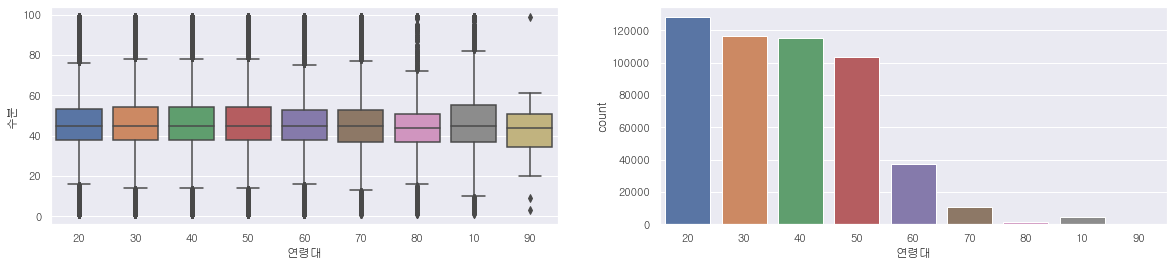

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.boxplot(x='연령대', y='수분', data=dat, ax=ax[0])
sns.countplot(x='연령대', data=dat, ax=ax[1])
plt.show()

### 성별

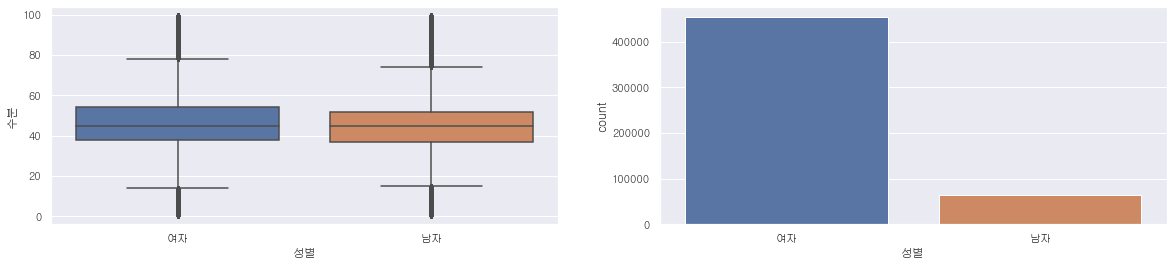

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
sns.boxplot(x='성별', y='수분', data=dat, ax=ax[0])
sns.countplot(x='성별', data=dat, ax=ax[1])
plt.show()

### 피부타입

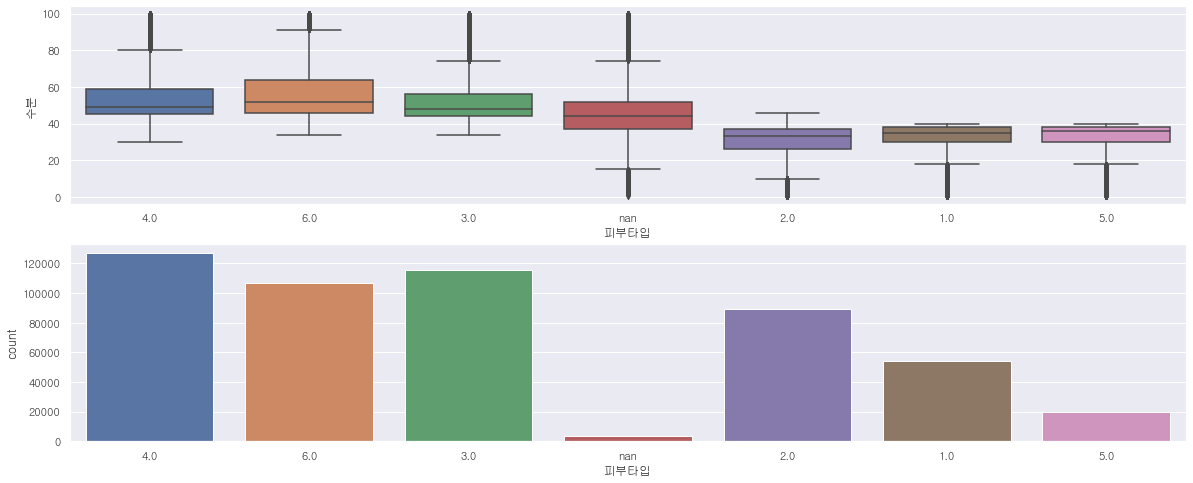

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='피부타입', y='수분', data=dat, ax=ax[0])
sns.countplot(x='피부타입', data=dat, ax=ax[1])
plt.show()

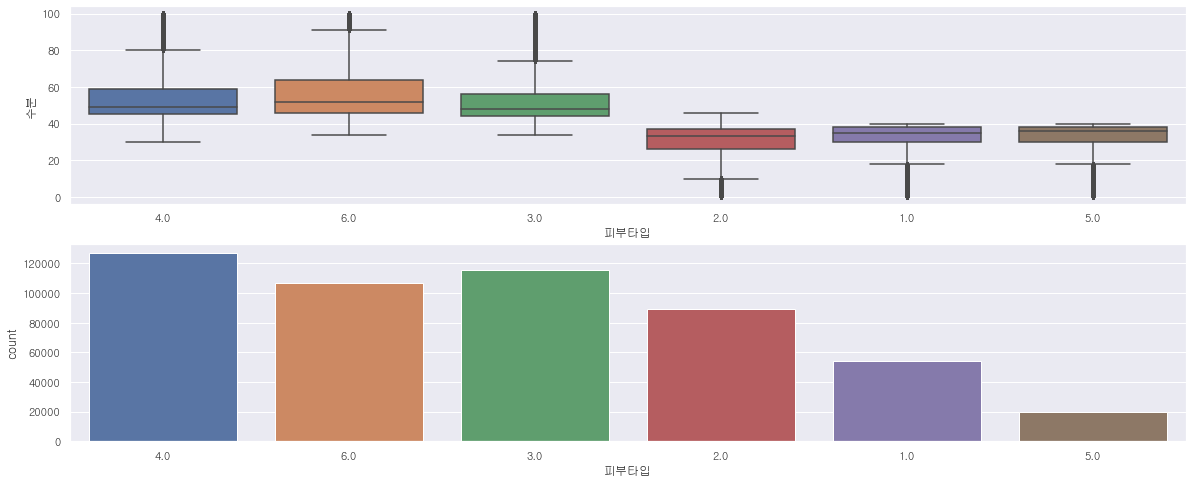

In [ ]:
dat2 = dat[~dat['피부타입'].str.contains('nan')] # nan 제거
dat2 = dat2.reset_index(drop=True) # index 초기화

fig, ax = plt.subplots(2, 1, figsize=(20,8))
sns.boxplot(x='피부타입', y='수분', data=dat2, ax=ax[0])
sns.countplot(x='피부타입', data=dat2, ax=ax[1])
plt.show()

In [ ]:
dat2.to_csv('수분방정식2.csv', encoding='euc-kr')

In [ ]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513303 entries, 0 to 513302
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   스토어명    513303 non-null  object 
 1   측정기기    513303 non-null  object 
 2   채널      513303 non-null  object 
 3   시,도     513303 non-null  object 
 4   광역유무2   513303 non-null  object 
 5   년       513303 non-null  object 
 6   월       513303 non-null  object 
 7   일       513303 non-null  object 
 8   시       513303 non-null  object 
 9   시간대     513303 non-null  object 
 10  연령      513303 non-null  int64  
 11  연령대     513303 non-null  object 
 12  성별      513303 non-null  object 
 13  피부타입    513303 non-null  object 
 14  수분      513303 non-null  int64  
 15  유분      513303 non-null  int64  
 16  탄력      513303 non-null  int64  
 17  평균 기온   513303 non-null  float64
 18  강수량     513303 non-null  float64
 19  평균 풍속   513303 non-null  float64
 20  평균 습도   513303 non-null  float64
 21  일조합     51